# Foundations of Data Science - Project 4 Brain Tumor Analysis

## Importing

### Importing libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
import numpy as np 
from numpy import sqrt
import seaborn as sns
import scipy as scs
import scipy.stats as sts

import sklearn
from sklearn.metrics import roc_curve, confusion_matrix, auc, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, SelectKBest
from sklearn.datasets import load_iris
from sklearn import svm


In [2]:
#Check Version:
print("Python version:", "3.10.10")
print("Matplotlib version:", mpl.__version__)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Seaborn version:", sns.__version__)
print("Scipy version:", scs.__version__)
print("Sklearn version:", sklearn.__version__)



Python version: 3.10.10
Matplotlib version: 3.7.1
Pandas version: 1.5.3
NumPy version: 1.23.5
Seaborn version: 0.12.2
Scipy version: 1.10.0
Sklearn version: 1.2.2


### Importing cvs files

In [3]:
clin_df_initial = pd.read_csv("../data/clinFeatures_UPENN.csv",index_col=False)
rad_df_initial = pd.read_csv("../data/radFeatures_UPENN.csv",index_col=False)


clin_df = clin_df_initial
rad_df = rad_df_initial

## Data overview

In [4]:
print(clin_df.shape)
print(rad_df.shape)

(611, 10)
(611, 4753)


In [5]:
print(clin_df.head(5))
print('----------------------------------')
print(rad_df.head(5))

            SubjectID Gender  Age_at_scan_years Survival_from_surgery_days  \
0  UPENN-GBM-00001_11      F              52.16              Not Available   
1  UPENN-GBM-00002_11      F              61.30                        291   
2  UPENN-GBM-00003_11      M              42.82              Not Available   
3  UPENN-GBM-00004_11      M              33.43              Not Available   
4  UPENN-GBM-00005_11      M              53.33              Not Available   

       IDH1           MGMT            KPS GTR_over90percent  \
0  Wildtype  Not Available  Not Available                 Y   
1  Wildtype  Not Available  Not Available                 Y   
2  Wildtype  Not Available  Not Available                 Y   
3   NOS/NEC  Not Available  Not Available                 Y   
4  Wildtype  Not Available  Not Available                 Y   

   Time_since_baseline_preop  PsP_TP_score  
0                          0           NaN  
1                          0           NaN  
2                

### Overview of clinical data set

In [6]:
#shape of data frame and data types
print(clin_df.info()) #patient numbers=611

print((clin_df.isna().sum(axis=1) == 0).sum()) #no patient with all attributes ->PsP_TP_score all (611) NaN 
print(clin_df['PsP_TP_score'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SubjectID                   611 non-null    object 
 1   Gender                      611 non-null    object 
 2   Age_at_scan_years           611 non-null    float64
 3   Survival_from_surgery_days  611 non-null    object 
 4   IDH1                        611 non-null    object 
 5   MGMT                        611 non-null    object 
 6   KPS                         611 non-null    object 
 7   GTR_over90percent           611 non-null    object 
 8   Time_since_baseline_preop   611 non-null    int64  
 9   PsP_TP_score                0 non-null      float64
dtypes: float64(2), int64(1), object(7)
memory usage: 47.9+ KB
None
0
Series([], Name: PsP_TP_score, dtype: int64)


In [7]:
print(clin_df.dtypes)

SubjectID                      object
Gender                         object
Age_at_scan_years             float64
Survival_from_surgery_days     object
IDH1                           object
MGMT                           object
KPS                            object
GTR_over90percent              object
Time_since_baseline_preop       int64
PsP_TP_score                  float64
dtype: object


In [8]:
# How many missing data is there in each row (axis = 1), default would be axis = 0
missing_values_1= clin_df.isna().sum(axis = 1) 
print(missing_values_1)

# How many missing data is there in each column (axis = 0)
missing_values_1= clin_df.isna().sum(axis = 0) 
print(missing_values_1)


0      1
1      1
2      1
3      1
4      1
      ..
606    1
607    1
608    1
609    1
610    1
Length: 611, dtype: int64
SubjectID                       0
Gender                          0
Age_at_scan_years               0
Survival_from_surgery_days      0
IDH1                            0
MGMT                            0
KPS                             0
GTR_over90percent               0
Time_since_baseline_preop       0
PsP_TP_score                  611
dtype: int64


In [9]:
#brief summary of the extremes/means/medians & distribution
print(clin_df.describe())
print('MGMT:\n', clin_df['MGMT'].value_counts())
print('IDH1:\n', clin_df['IDH1'].value_counts())
print('KPS:\n', clin_df['KPS'].value_counts())
print('Time_since_baseline_preop:\n', clin_df['Time_since_baseline_preop'].value_counts())
print('Survival_from_surgery_days:\n', clin_df['Survival_from_surgery_days'].value_counts())

#Duplicate rows
print('Amount of duplicates:', clin_df.duplicated().sum())

       Age_at_scan_years  Time_since_baseline_preop  PsP_TP_score
count         611.000000                      611.0           0.0
mean           62.977594                        0.0           NaN
std            12.424672                        0.0           NaN
min            18.650000                        0.0           NaN
25%            55.910000                        0.0           NaN
50%            63.580000                        0.0           NaN
75%            71.665000                        0.0           NaN
max            88.500000                        0.0           NaN
MGMT:
 Not Available    322
Unmethylated     151
Methylated       111
Indeterminate     27
Name: MGMT, dtype: int64
IDH1:
 Wildtype    499
NOS/NEC      96
Mutated      16
Name: IDH1, dtype: int64
KPS:
 Not Available    536
90                37
80                18
60                 6
70                 6
100                5
40                 2
30                 1
Name: KPS, dtype: int64
Time_since_b

In [10]:
print('GTR_over90percent:\n',clin_df['GTR_over90percent'].value_counts()) #first considered as potential outcome
df_GTR = pd.DataFrame(clin_df['GTR_over90percent'])

GTR_over90percent:
 Y                362
N                211
Not Available     38
Name: GTR_over90percent, dtype: int64


### Overview of MRI data set 

In [11]:
#Description of MRI data (=rad_df)
print(rad_df.shape)
print(rad_df.head(5))
print(rad_df.info())
print(rad_df.describe())

(611, 4753)
            SubjectID  FLAIR_ED_Intensity_CoefficientOfVariation  \
0  UPENN-GBM-00001_11                                   0.132367   
1  UPENN-GBM-00002_11                                   0.183761   
2  UPENN-GBM-00003_11                                   0.178541   
3  UPENN-GBM-00004_11                                   0.178110   
4  UPENN-GBM-00005_11                                   0.161688   

   FLAIR_ED_Intensity_Energy  FLAIR_ED_Intensity_InterQuartileRange  \
0                  496350786                                     28   
1                 5059094750                                     50   
2                 1285339782                                     48   
3                  604801952                                     36   
4                  957903597                                     29   

   FLAIR_ED_Intensity_Kurtosis  FLAIR_ED_Intensity_Maximum  \
0                     2.614272                         223   
1                     2.1918

In [12]:
#Check the data types
print(rad_df.dtypes)

SubjectID                                     object
FLAIR_ED_Intensity_CoefficientOfVariation    float64
FLAIR_ED_Intensity_Energy                      int64
FLAIR_ED_Intensity_InterQuartileRange          int64
FLAIR_ED_Intensity_Kurtosis                  float64
                                              ...   
DSC_PH_ED_NGTDM_Coarsness                    float64
DSC_PH_ED_NGTDM_Complexity                   float64
DSC_PH_ED_NGTDM_Contrast                     float64
DSC_PH_ED_NGTDM_Strength                     float64
DSC_PH_ED_LBP_Radius-1_Bins-16_LBP           float64
Length: 4753, dtype: object


In [13]:
#Missing values for each row and column
missing_values_2= rad_df.isna().sum(axis = 1)
print(missing_values_2)

missing_values_2= rad_df.isna().sum(axis = 0)
print(missing_values_2)


0         0
1         0
2         1
3         0
4         0
       ... 
606       0
607       0
608    3024
609    1296
610       1
Length: 611, dtype: int64
SubjectID                                      0
FLAIR_ED_Intensity_CoefficientOfVariation      0
FLAIR_ED_Intensity_Energy                      0
FLAIR_ED_Intensity_InterQuartileRange          0
FLAIR_ED_Intensity_Kurtosis                    0
                                            ... 
DSC_PH_ED_NGTDM_Coarsness                    137
DSC_PH_ED_NGTDM_Complexity                   137
DSC_PH_ED_NGTDM_Contrast                     137
DSC_PH_ED_NGTDM_Strength                     137
DSC_PH_ED_LBP_Radius-1_Bins-16_LBP           137
Length: 4753, dtype: int64


In [14]:
print(rad_df[rad_df.isna().any(axis=1)])

              SubjectID  FLAIR_ED_Intensity_CoefficientOfVariation  \
2    UPENN-GBM-00003_11                                   0.178541   
6    UPENN-GBM-00007_11                                   0.109750   
8    UPENN-GBM-00009_11                                   0.168292   
12   UPENN-GBM-00013_11                                   0.154804   
14   UPENN-GBM-00015_11                                   0.145827   
..                  ...                                        ...   
602  UPENN-GBM-00603_11                                   0.285861   
605  UPENN-GBM-00606_11                                   0.181507   
608  UPENN-GBM-00609_11                                   0.086481   
609  UPENN-GBM-00610_11                                   0.173975   
610  UPENN-GBM-00611_11                                   0.213772   

     FLAIR_ED_Intensity_Energy  FLAIR_ED_Intensity_InterQuartileRange  \
2                   1285339782                                     48   
6            

## Preprocessing 

In [15]:
#Remove TP score column (because it's empty)
clin_df=clin_df.drop(columns=['PsP_TP_score'], axis=1) 
#check if the column has been removed correctly
print(clin_df.columns)

Index(['SubjectID', 'Gender', 'Age_at_scan_years',
       'Survival_from_surgery_days', 'IDH1', 'MGMT', 'KPS',
       'GTR_over90percent', 'Time_since_baseline_preop'],
      dtype='object')


In [16]:
#clean data
clin_df=clin_df[clin_df.Survival_from_surgery_days != 'Not Available']
print('Survival_from_surgery_days:\n', clin_df['Survival_from_surgery_days'].value_counts())
print(clin_df.shape)

Survival_from_surgery_days:
 80      4
376     4
205     3
516     3
182     3
       ..
419     1
1148    1
253     1
379     1
551     1
Name: Survival_from_surgery_days, Length: 355, dtype: int64
(452, 9)


In [17]:
#adapt rad_df to processed clin data index
rad_df=rad_df.loc[clin_df.index]
print(rad_df.shape)

(452, 4753)


In [18]:
#GTR numeric transformation (0=no, 1=yes, 2=Not available)
clin_df['GTR_over90percent']=pd.Categorical(clin_df['GTR_over90percent'], ordered=False)
print(clin_df.dtypes)
clin_df['GTR_over90percent'] = pd.factorize(clin_df['GTR_over90percent'])[0]
#print(clin_df)
print(clin_df['GTR_over90percent'].value_counts())

SubjectID                       object
Gender                          object
Age_at_scan_years              float64
Survival_from_surgery_days      object
IDH1                            object
MGMT                            object
KPS                             object
GTR_over90percent             category
Time_since_baseline_preop        int64
dtype: object
0    259
1    165
2     28
Name: GTR_over90percent, dtype: int64


In [19]:
#restrict analysis to complete cases
#print(rad_df.shape)
rad_df = rad_df[rad_df.isna().sum(axis=1)==0]
#print('missing values left?', rad_df[rad_df.isna().any(axis=1)])
#print(rad_df.shape) ##reduced from 452 to 312


In [20]:
#saving the dataset after preprocessing for the visualisation
# Create a new dataset clin_df_vis with columns from clin_df
clin_df_vis = clin_df.assign(Gender=clin_df['Gender'], Age_at_scan_years=clin_df['Age_at_scan_years'])

# Print the resulting dataset
print(clin_df_vis)

              SubjectID Gender  Age_at_scan_years Survival_from_surgery_days  \
1    UPENN-GBM-00002_11      F              61.30                        291   
5    UPENN-GBM-00006_11      M              52.99                        626   
7    UPENN-GBM-00008_11      F              55.06                        469   
8    UPENN-GBM-00009_11      M              69.12                        561   
10   UPENN-GBM-00011_11      F              39.61                        798   
..                  ...    ...                ...                        ...   
600  UPENN-GBM-00601_11      M              59.69                        435   
601  UPENN-GBM-00602_11      M              77.19                        252   
603  UPENN-GBM-00604_11      F              62.00                        234   
608  UPENN-GBM-00609_11      M              29.01                        138   
610  UPENN-GBM-00611_11      M              58.09                        551   

         IDH1           MGMT           

In [21]:
#Gender numeric transformation (M = 0 and F = 1)
clin_df['Gender'] = clin_df['Gender'].map({'F': 0, 'M': 1})

### Merging the two data sets 

In [22]:
merged_df = pd.merge(clin_df, rad_df, on='SubjectID')
#print(merged_df.columns)
#print(merged_df.shape)
merged_df=merged_df.drop(columns=['SubjectID','Time_since_baseline_preop','KPS','Time_since_baseline_preop', 'IDH1', 'MGMT'], axis=1)

## Splitting Data

### Splitting into training and test set

In [23]:
# Construct features and labels
df_X = merged_df.drop("Survival_from_surgery_days", axis=1)
df_y = merged_df["Survival_from_surgery_days"]

print(df_X)
print(df_y)

     Gender  Age_at_scan_years  GTR_over90percent  \
0         0              61.30                  0   
1         1              52.99                  0   
2         0              55.06                  0   
3         0              39.61                  0   
4         1              53.85                  0   
..      ...                ...                ...   
307       0              81.95                  2   
308       0              61.92                  0   
309       1              59.69                  0   
310       1              77.19                  2   
311       0              62.00                  2   

     FLAIR_ED_Intensity_CoefficientOfVariation  FLAIR_ED_Intensity_Energy  \
0                                     0.183761                 5059094750   
1                                     0.169233                 1091787939   
2                                     0.077288                  985265247   
3                                     0.199701         

In [24]:
# Split the dataset into training and testing sets using the sklearn 'train_test_split' function into 80% for training and 20% for testing,
# set the random seed to 2023.

df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 2023)


#Scale the data

sc = StandardScaler()

df_X_train = sc.fit_transform(df_X_train)
df_X_test = sc.transform(df_X_test)

#convert it back into a pandas dataframe: 

df_X_train = pd.DataFrame(df_X_train, columns=df_X.columns)
df_X_test = pd.DataFrame(df_X_test, columns=df_X.columns)

# Data visualization 

In [25]:
#Visualization: 

#custom colorblind friendly colors dictionary 
colorblind_15 = {
    # Source: http://mkweb.bcgsc.ca/biovis2012/color-blindness-palette.png
    'green':      [36, 255, 36],   #24ff24
    'orange':     [219, 109, 0],   #db6d00
    'lightblue':  [182, 219, 255], #b6dbff
    'darkblue':   [0, 109, 219],   #006ddb
    'violet':     [182, 109, 255], #b66dff
    'darkgreen':  [0, 73, 73],     #004949
    'brown':      [146, 73, 0],    #924900
    'purple':     [73, 0, 146],    #490092
    'red':        [146, 0, 0],     #920000
    'lightpink':  [255, 182, 219], #ffb6db
    'lightgreen': [0, 146, 146],   #009292
    'pink':       [255, 109, 182], #ff6db6
    'blue':       [109, 182, 255], #6db6ff
    'yellow':     [255, 255, 109], #ffff6d
    'black':      [0, 0, 0]        #000000
}
colorblind_normalized = {} 

for color, RGB in colorblind_15.items(): 
    # Get each RGB values
    r,g,b = colorblind_15[color]
    # Store the normalized values
    colorblind_normalized[color] = [r/255, g/255, b/255]
    
# Create a custom color palette compatible with seaborn library 
colorblind_palette_seaborn = colorblind_normalized

#set the default colorblind palette
sns.set_palette(colorblind_palette_seaborn)


In [26]:
#color palette for report: black, malibu blue and silver
color_palette_bbg=['#000000', '#6db6ff', '#a3a3a3']

In [27]:
#duplicates in clinical data? 
dup = clin_df_vis.duplicated().any()
print(dup)


False


### Age Distribution split by Gender

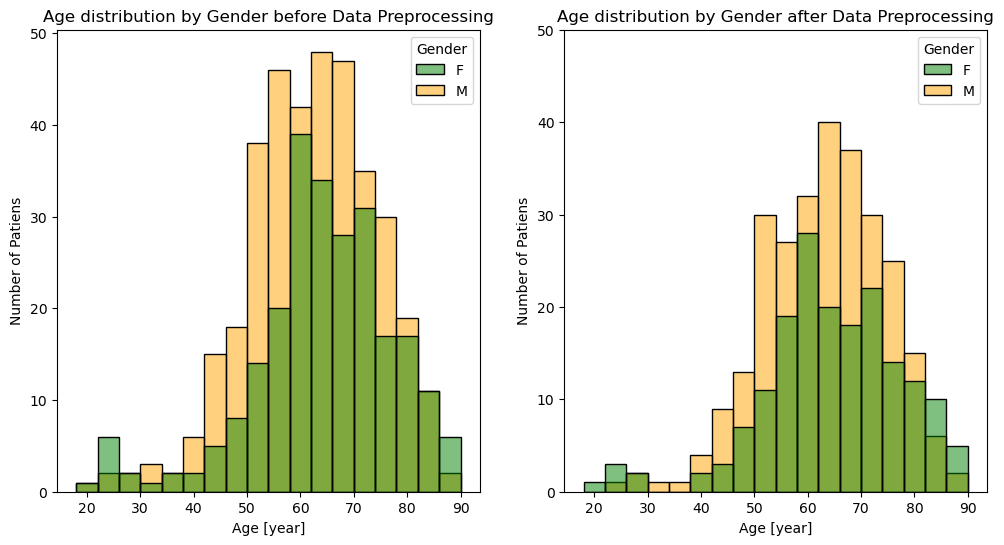

In [28]:
# age distributed by gender: 
#difference before and after: 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
age_gender_before = sns.histplot(clin_df_initial, x ='Age_at_scan_years', binwidth = 4, hue ='Gender', binrange= (18, 90), ax = axes[0])
age_gender_after = sns.histplot(clin_df_vis, x ='Age_at_scan_years', binwidth = 4, hue ='Gender', binrange= (18, 90), ax = axes[1])
label_axes_before = age_gender_before.set(xlabel='Age [year]', ylabel='Number of Patiens', title= 'Age distribution by Gender before Data Preprocessing') 
label_axes_after = age_gender_after.set(xlabel='Age [year]', ylabel='Number of Patiens', title= 'Age distribution by Gender after Data Preprocessing') 
plt.ylim(0, 50)

plt.savefig('../output/age_distribution_gender.png')


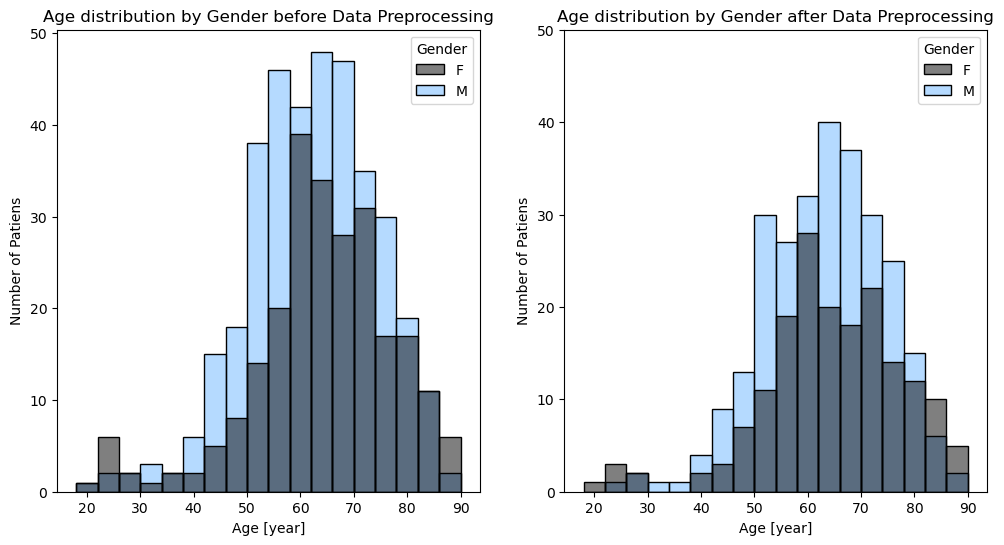

In [29]:
# age distributed by gender: 
#difference before and after: 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
age_gender_before = sns.histplot(clin_df_initial, x ='Age_at_scan_years', palette=color_palette_bbg[:2], binwidth = 4, hue ='Gender', binrange= (18, 90), ax = axes[0])
age_gender_after = sns.histplot(clin_df_vis, x ='Age_at_scan_years', palette=color_palette_bbg[:2],binwidth = 4, hue ='Gender', binrange= (18, 90), ax = axes[1])
label_axes_before = age_gender_before.set(xlabel='Age [year]', ylabel='Number of Patiens', title= 'Age distribution by Gender before Data Preprocessing') 
label_axes_after = age_gender_after.set(xlabel='Age [year]', ylabel='Number of Patiens', title= 'Age distribution by Gender after Data Preprocessing') 
plt.ylim(0, 50)

plt.savefig('../output/age_distribution_gender_blackblue.png')


### Survival days based on Age and Gender

/var/folders/1n/wdp99cbs11199mw5mbmqfct40000gn/T/ipykernel_21248/1693881267.py:34: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


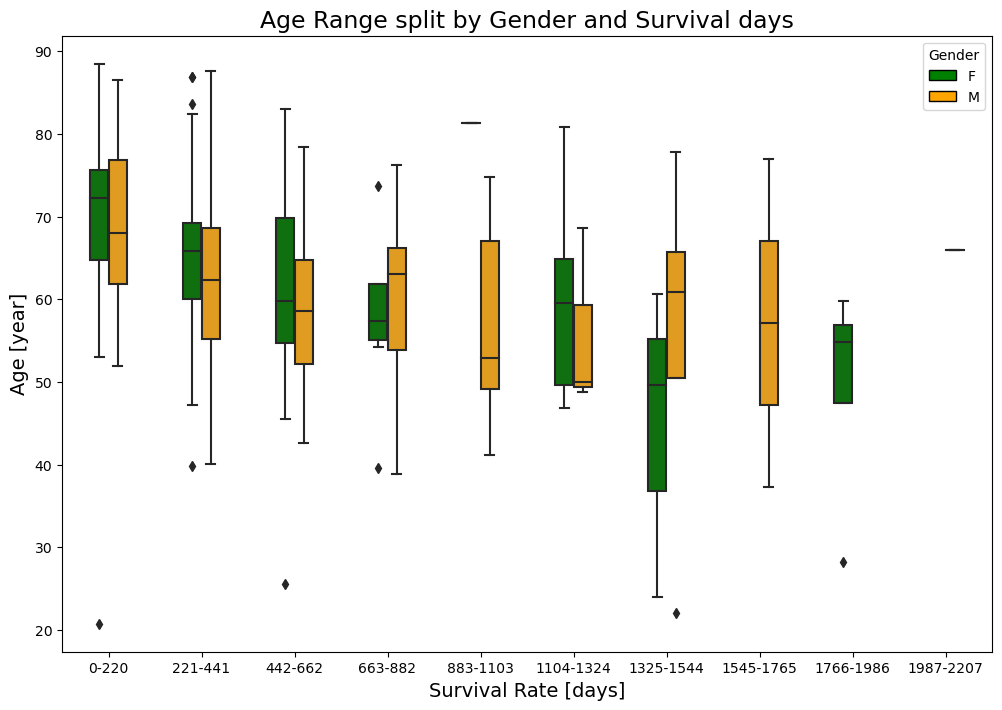

In [30]:
#Box plots for survival days (x-axis) and age (y-axis) and gender (hue)
a = np.arange(0, 2208)
#print(a)
bins = 10
_, b = np.histogram(a, bins)
#print(b)
c = np.array(merged_df['Survival_from_surgery_days']).astype(int)
_, d = np.histogram(c, bins)
indices = np.digitize(c, d)
#print(indices)
#print(b)


plt.figure(figsize=(12, 8))
fig_surv_age = sns.boxplot(x = indices, y = merged_df['Age_at_scan_years'], hue=merged_df['Gender'], width=0.4)
#fig_label =fig_surv_age.set(xlabel='Survival Rate [days]', ylabel='Age [year]', title= 'Age Range split by Gender and Outcome')
plt.xlabel('Survival Rate [days]', fontsize=14)
plt.ylabel('Age [year]', fontsize=14)
plt.title('Age Range split by Gender and Survival days', fontsize=17)
custom_labels = ['0-220', '221-441', '442-662', '663-882', '883-1103', '1104-1324', '1325-1544', '1545-1765', '1766-1986', '1987-2207']
fig_surv_age.set_xticklabels(custom_labels)


#Modify legend: 
unique_values = clin_df['Gender'].unique()
#Create custom legend handles and labels
custom_handles = [plt.Rectangle((0, 0), 1, 1, fc=color)  for color in sns.color_palette(n_colors=len(unique_values))]

custom_labels = ['F', 'M']
fig_surv_age.legend(custom_handles, custom_labels, title='Gender')

#Aesthetics: Black frame around the colours of the legend
legend = plt.legend(handles=custom_handles, labels=custom_labels, title='Gender')
for handle in legend.legendHandles:
    handle.set_linewidth(1)
    handle.set_edgecolor('black')



plt.savefig('../output/boxplot_survival_age_gender')

/var/folders/1n/wdp99cbs11199mw5mbmqfct40000gn/T/ipykernel_21248/3008165339.py:33: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


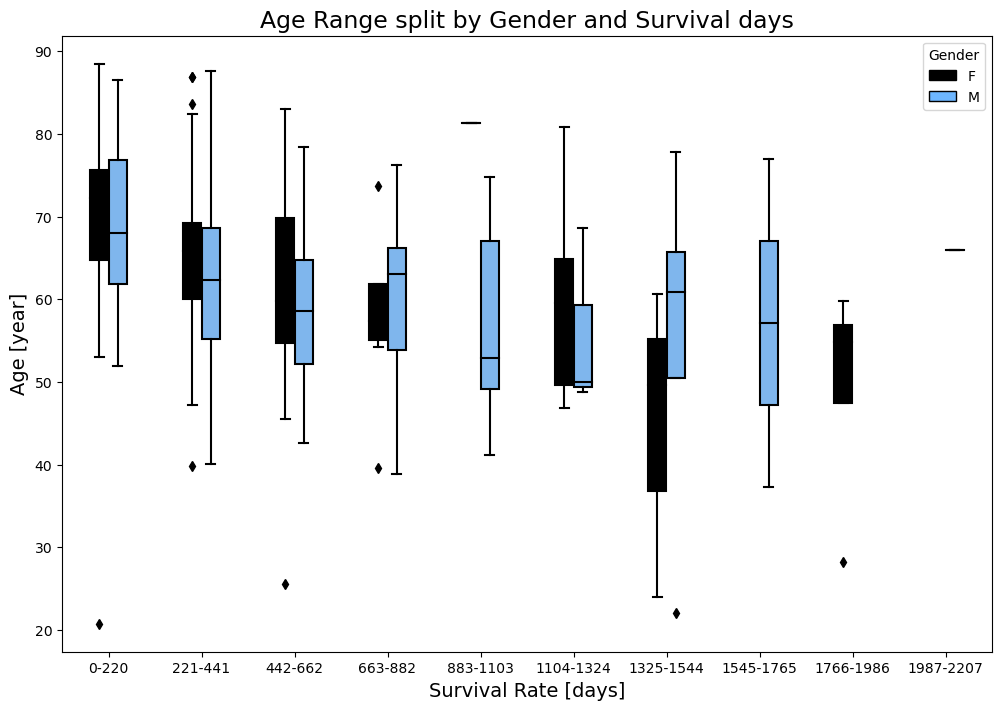

In [31]:
#Box plots for survival days (x-axis) and age (y-axis) and gender (hue)
a = np.arange(0, 2208)
#print(a)
bins = 10
_, b = np.histogram(a, bins)
#print(b)
c = np.array(merged_df['Survival_from_surgery_days']).astype(int)
_, d = np.histogram(c, bins)
indices = np.digitize(c, d)
#print(indices)
#print(b)


plt.figure(figsize=(12, 8))
fig_surv_age = sns.boxplot(x = indices, y = merged_df['Age_at_scan_years'], hue=merged_df['Gender'], palette=color_palette_bbg[:2], width=0.4)
#fig_label =fig_surv_age.set(xlabel='Survival Rate [days]', ylabel='Age [year]', title= 'Age Range split by Gender and Outcome')
plt.xlabel('Survival Rate [days]', fontsize=14)
plt.ylabel('Age [year]', fontsize=14)
plt.title('Age Range split by Gender and Survival days', fontsize=17)
custom_labels = ['0-220', '221-441', '442-662', '663-882', '883-1103', '1104-1324', '1325-1544', '1545-1765', '1766-1986', '1987-2207']
fig_surv_age.set_xticklabels(custom_labels)


#Modify legend: 
unique_values = clin_df['Gender'].unique()
#Create custom legend handles and labels
custom_handles = [plt.Rectangle((0, 0), 1, 1, fc=color)  for color in  sns.color_palette(color_palette_bbg[:2])]
custom_labels = ['F', 'M']
fig_surv_age.legend(custom_handles, custom_labels, title='Gender')

#Aesthetics: Black frame around the colours of the legend
legend = plt.legend(handles=custom_handles, labels=custom_labels, title='Gender')
for handle in legend.legendHandles:
    handle.set_linewidth(1)
    handle.set_edgecolor('black')



plt.savefig('../output/boxplot_survival_age_gender_blackblue')


# Correlations between Variables  

## Test for normality and correlations

In [32]:
correlation_matrix = df_X_train.corr(method ='spearman')
#print(correlation_matrix.shape)
#print(correlation_matrix)

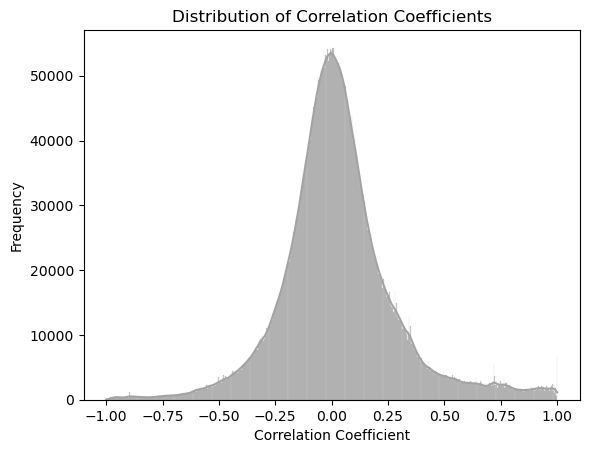

In [33]:
# coefficient matrix upper triangle
#indices = np.triu_indices(correlation_matrix.shape[0], k=1)
#array_correlation_matrix = correlation_matrix[indices]

#print(array_correlation_matrix)

# Exclude duplicate and diagonal values
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k = 1)
#mask = np.triu_indices_from(correlation_matrix, k = 1)

correlation_matrix_clean = correlation_matrix.where(mask)
print()

# Flatten the correlation matrix (excluding NaN values)
correlation_values = correlation_matrix_clean.stack().values

# Plot the distribution of correlation coefficients
sns.histplot(correlation_values, kde=True, color = color_palette_bbg[2])
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Correlation Coefficients')

plt.savefig('../output/distribution_of_correlation_coefficients.png') 

plt.show()


In [34]:
print(correlation_matrix_clean)
print('******************************')
print(correlation_values)
print('******************************')
print(correlation_values.shape)

                                           Gender  Age_at_scan_years  \
Gender                                        NaN          -0.126276   
Age_at_scan_years                             NaN                NaN   
GTR_over90percent                             NaN                NaN   
FLAIR_ED_Intensity_CoefficientOfVariation     NaN                NaN   
FLAIR_ED_Intensity_Energy                     NaN                NaN   
...                                           ...                ...   
DSC_PH_ED_NGTDM_Coarsness                     NaN                NaN   
DSC_PH_ED_NGTDM_Complexity                    NaN                NaN   
DSC_PH_ED_NGTDM_Contrast                      NaN                NaN   
DSC_PH_ED_NGTDM_Strength                      NaN                NaN   
DSC_PH_ED_LBP_Radius-1_Bins-16_LBP            NaN                NaN   

                                           GTR_over90percent  \
Gender                                             -0.032556   
Age_at_

In [35]:
data = df_X_train
print(data.shape)

(249, 4755)


In [36]:
print(correlation_matrix.shape)

(4755, 4755)


In [37]:
#dropping one of the features with a correlation higher than +/-0.7 (based on literature)
correlation_threshold = 0.7
dropped_features = set()


for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if np.sqrt((correlation_matrix.iloc[i, j])**2) >= (correlation_threshold):
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            if colname_i not in dropped_features:
                dropped_features.add(colname_j)
                

# Drop the correlated features from the dataset
data.drop(dropped_features, axis = 1, inplace=True)

# Print the updated dataset
print(data.shape)



(249, 741)


In [38]:
df_X_test.drop(dropped_features, axis = 1, inplace=True)

## Feature selection

### Univariate Feature selection (Recursive Feature Eliminiation)

In [39]:
#univariate feature selection -> RFE: 
data = pd.DataFrame(data)
df_y_train = pd.Series(df_y_train) 

estimator = LinearRegression()
rfe = RFE(estimator=estimator, n_features_to_select=236)
rfe.fit(data, df_y_train)
selected_features = rfe.support_

### Comparison: Mutual Info Regression

In [40]:
# Models performed better with RFE -> used mututal_info_regression for the comparison

"""
mutual_info = mutual_info_regression(data, df_y_train)

#Representing in list form
mutual_info = pd.Series(mutual_info)
mutual_info.index = data.columns
#print(mutual_info.sort_values(ascending=False))

#plotting
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
mutual_info_not=(mutual_info.values<0.001).sum()

#print(mutual_info_not)
k=741-mutual_info_not
print(k)

#Selecting best k features

from sklearn.feature_selection import SelectKBest

#selecting the top important features
sel_best_cols = SelectKBest(mutual_info_regression, k=k)
sel_best_cols.fit(data, df_y_train)
selected_features_columns = data.columns[sel_best_cols.get_support()]
"""
#k=236 -> used also 236 features for the RFE

'\nmutual_info = mutual_info_regression(data, df_y_train)\n\n#Representing in list form\nmutual_info = pd.Series(mutual_info)\nmutual_info.index = data.columns\n#print(mutual_info.sort_values(ascending=False))\n\n#plotting\nmutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))\nmutual_info_not=(mutual_info.values<0.001).sum()\n\n#print(mutual_info_not)\nk=741-mutual_info_not\nprint(k)\n\n#Selecting best k features\n\nfrom sklearn.feature_selection import SelectKBest\n\n#selecting the top important features\nsel_best_cols = SelectKBest(mutual_info_regression, k=k)\nsel_best_cols.fit(data, df_y_train)\nselected_features_columns = data.columns[sel_best_cols.get_support()]\n'

In [41]:
#print(selected_features)

In [42]:
selected_features_columns = data.columns[selected_features]

In [43]:
print(selected_features_columns)
print(selected_features_columns.shape)

Index(['Gender', 'Age_at_scan_years',
       'FLAIR_ED_Intensity_MeanAbsoluteDeviation',
       'FLAIR_ED_Histogram_Bins-16_Bins-16_Bin-8_Probability',
       'FLAIR_ED_Histogram_Bins-16_Bins-16_MeanAbsoluteDeviation',
       'FLAIR_ED_Histogram_Bins-16_Bins-16_NinetyFifthPercentileMean',
       'FLAIR_ED_GLSZM_Bins-16_Radius-1_ZoneSizeEntropy',
       'FLAIR_ED_GLSZM_Bins-16_Radius-1_ZoneSizeNoneUniformityNormalized',
       'T1_ED_Intensity_MeanAbsoluteDeviation', 'T1_ED_Intensity_Minimum',
       ...
       'DSC_PH_ED_Histogram_Bins-16_Bins-16_Bin-15_Probability',
       'DSC_PH_ED_Histogram_Bins-16_Bins-16_Bin-3_Probability',
       'DSC_PH_ED_Histogram_Bins-16_Bins-16_MeanAbsoluteDeviation',
       'DSC_PH_ED_Histogram_Bins-16_Bins-16_MedianAbsoluteDeviation',
       'DSC_PH_ED_Morphologic_Elongation', 'DSC_PH_ED_Morphologic_Flatness',
       'DSC_PH_ED_GLCM_Bins-16_Radius-1_ClusterShade',
       'DSC_PH_ED_GLSZM_Bins-16_Radius-1_SmallZoneLowGreyLevelEmphasis',
       'DSC_PH_ED_G

In [44]:
data_final_features = data[selected_features_columns]

In [45]:
print(data_final_features)

       Gender  Age_at_scan_years  FLAIR_ED_Intensity_MeanAbsoluteDeviation  \
0    0.860964          -0.967920                                 -1.010457   
1   -1.161489          -3.387437                                 -0.085021   
2   -1.161489           0.994184                                  0.279330   
3   -1.161489          -0.224404                                  2.987011   
4    0.860964          -0.374520                                 -0.822489   
..        ...                ...                                       ...   
244 -1.161489           0.429925                                 -1.235635   
245 -1.161489          -2.147655                                 -2.216408   
246  0.860964          -0.589098                                 -0.656680   
247  0.860964           0.117330                                 -1.120912   
248  0.860964          -0.429269                                 -0.735025   

     FLAIR_ED_Histogram_Bins-16_Bins-16_Bin-8_Probability  \
0 

## Adjusting the test data: need the same features

In [46]:
df_X_test_final_features = df_X_test[selected_features_columns]


In [47]:
print(df_X_test_final_features)

      Gender  Age_at_scan_years  FLAIR_ED_Intensity_MeanAbsoluteDeviation  \
0   0.860964          -0.507859                                 -1.727006   
1   0.860964           0.175611                                  0.875053   
2  -1.161489           0.278926                                  0.083298   
3   0.860964           0.607415                                  0.735548   
4  -1.161489          -1.264620                                  0.115178   
..       ...                ...                                       ...   
58  0.860964          -1.503923                                 -0.013814   
59  0.860964           0.005185                                 -0.401344   
60  0.860964           0.446702                                  0.323527   
61 -1.161489          -3.155199                                  7.946825   
62 -1.161489           0.805215                                  0.343042   

    FLAIR_ED_Histogram_Bins-16_Bins-16_Bin-8_Probability  \
0              

In [48]:
print(data.shape)
print(df_y_train.shape)

(249, 741)
(249,)


## Machine Learning Models with cross validation

### Evaluation metrics

In [49]:
    
def get_scores(model, data_final_features, df_y_train, df_X_test, df_y_test):
    y_pred_test = model.predict(df_X_test)
    y_pred_train = model.predict(data_final_features)
    
    # evaluation
    #r2_test = r2_score(y_test, y_pred_test)
    #rmse_test = mean_squared_error(y_test, y_pred_test, squared=True)
    r2_test = r2_score(df_y_test, y_pred_test)
    rmse_test = mean_squared_error(df_y_test, y_pred_test, squared=True)

    #r2_train = r2_score(y_train, y_pred_train)
    #rmse_train = mean_squared_error(y_train, y_pred_train, squared=True)
    r2_train = r2_score(df_y_train, y_pred_train)
    rmse_train = mean_squared_error(df_y_train, y_pred_train, squared=True)


    print('Training set score: R2 score: {:.3f}, RMSE: {:.3f}'.format(r2_train, rmse_train))
    print('Test set score: R2 score: {:.3f}, RMSE: {:.3f}'.format(r2_test, rmse_test))


############################################################################################################

def evaluation_metrics(clf, y, X):
    # Get the predicted labels
    y_test_pred = clf.predict(X)

    # Calculate the evaluation metrics for regression
    r2 = r2_score(y, y_test_pred)
    mse = mean_squared_error(y, y_test_pred)
    rmse = sqrt(mse) 
    mae = mean_absolute_error(y, y_test_pred)
    
    return [r2, rmse, mae]

### Crossvalidation

In [50]:
# Perform a 3-fold cross-validation

# Set the random seed
random_seed = 42
np.random.seed(random_seed)

# Initialize the cross-validator
n_splits = 3
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_seed)

# Prepare the performance overview DataFrame
df_performance = pd.DataFrame(columns=['fold', 'clf', 'r2', 'rmse', 'mae'])

# Use this counter to save your performance metrics for each cross-validation fold
fold_number = 0
for train_index, test_index in kf.split(data_final_features):
    
    x_train_cv = data_final_features.iloc[train_index] 
    x_val_cv = data_final_features.iloc[test_index]
    y_train_cv = df_y_train.iloc[train_index]
    y_val_cv = df_y_train.iloc[test_index]
    
    # Linear regression
    clf = LinearRegression()
    clf.fit(x_train_cv, y_train_cv)
    eval_metrics_LR = evaluation_metrics(clf, y_val_cv, x_val_cv)
    df_performance.loc[len(df_performance)-1, :] = [fold_number, 'LinearRegression'] + eval_metrics_LR

    # Lasso regression
    clf_lasso = Lasso(random_state=random_seed)
    clf_lasso.fit(x_train_cv, y_train_cv)
    eval_metrics_lasso = evaluation_metrics(clf_lasso, y_val_cv, x_val_cv)
    df_performance.loc[len(df_performance)-1, :] = [fold_number, 'LassoRegression'] + eval_metrics_lasso

    # Ridge regression
    clf_ridge = Ridge(random_state=random_seed)
    clf_ridge.fit(x_train_cv, y_train_cv)
    eval_metrics_ridge = evaluation_metrics(clf_ridge, y_val_cv, x_val_cv)
    df_performance.loc[len(df_performance)-1, :] = [fold_number, 'RidgeRegression'] + eval_metrics_ridge

    # Random forest
    clf_rf = RandomForestRegressor(random_state=random_seed)
    clf_rf.fit(x_train_cv, y_train_cv)
    eval_metrics_rf = evaluation_metrics(clf_rf, y_val_cv, x_val_cv)
    df_performance.loc[len(df_performance)-1, :] = [fold_number, 'RandomForest'] + eval_metrics_rf
    
    #SVM
    clf_svm = svm.SVR(kernel='rbf')
    clf_svm.fit(x_train_cv, y_train_cv)
    eval_metrics_svm = evaluation_metrics(clf_svm, y_val_cv, x_val_cv)
    df_performance.loc[len(df_performance)-1, :] = [fold_number, 'SupportVectorMachine'] + eval_metrics_svm    

    # Increase counter for folds
    fold_number += 1

# Print the performance overview DataFrame
print(df_performance)


/Users/melaniegrimm/miniconda3/envs/tutorial4/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.666e+03, tolerance: 2.045e+03
  model = cd_fast.enet_coordinate_descent(


    fold                   clf        r2        rmse         mae
-1     0      LinearRegression  0.131658   353.22046  262.702982
 0     0       LassoRegression  -0.13344  403.552183  304.253577
 1     0       RidgeRegression  0.129106  353.739146  261.726206
 2     0          RandomForest  0.022489  374.766952  278.707349
 3     0  SupportVectorMachine -0.024958  383.754443  276.721853
 4     1      LinearRegression   0.25655  316.897153   248.50113
 5     1       LassoRegression -0.041259  375.034957  284.964325
 6     1       RidgeRegression   0.25914  316.344717  248.161433
 7     1          RandomForest  0.075062  353.466983  253.506988
 8     1  SupportVectorMachine -0.028866   372.79657  244.396728
 9     2      LinearRegression  0.052068  324.752969  264.066071
 10    2       LassoRegression  -0.46285  403.426361  324.139016
 11    2       RidgeRegression  0.052167  324.735973  262.584157
 12    2          RandomForest -0.017374  336.437814  258.433012
 13    2  SupportVectorMa

In [51]:
df_performance_mean = df_performance.groupby('clf').mean()
print(df_performance_mean)

                      fold        r2        rmse         mae
clf                                                         
LassoRegression        1.0 -0.212516  394.004500  304.452306
LinearRegression       1.0  0.146758  331.623527  258.423394
RandomForest           1.0  0.026725  354.890583  263.549116
RidgeRegression        1.0  0.146804  331.606612  257.490599
SupportVectorMachine   1.0 -0.025714  364.656692  257.304354


## Final Feature selection

In [52]:
coefficients = clf_ridge.coef_
abs_coefficients = abs(coefficients)


# Compute the normalized feature importance
feature_importance = abs_coefficients / abs_coefficients.sum()

# Create a dictionary to store the feature importance
feature_importance_dict = dict(zip(data_final_features.columns, feature_importance))

# Sort the feature importance dictionary by values in descending order
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))



# Get all features
all_indices = abs_coefficients.argsort()[:][::-1]

all_features = [data_final_features.columns[i] for i in all_indices]


# Get the top 10 features based on the absolute coefficient values
top_10_indices = abs_coefficients.argsort()[-10:][::-1]

top_10_features = [data_final_features.columns[i] for i in top_10_indices]



/var/folders/1n/wdp99cbs11199mw5mbmqfct40000gn/T/ipykernel_21248/1156763882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df_all = feature_importance_df_all.append({'Feature': feature, 'Importance': importance_all}, ignore_index=True)
/var/folders/1n/wdp99cbs11199mw5mbmqfct40000gn/T/ipykernel_21248/1156763882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df_all = feature_importance_df_all.append({'Feature': feature, 'Importance': importance_all}, ignore_index=True)
/var/folders/1n/wdp99cbs11199mw5mbmqfct40000gn/T/ipykernel_21248/1156763882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df_all = feature_importance_df_all.append({'Feature': feature, 

                                               Feature  Importance
0            DTI_TR_ET_Intensity_MeanAbsoluteDeviation    0.013530
1    DTI_FA_ED_GLSZM_Bins-16_Radius-1_GreyLevelVari...    0.012380
2    T2_ET_GLSZM_Bins-16_Radius-1_ZoneSizeNoneUnifo...    0.011375
3    DTI_RD_ED_GLSZM_Bins-16_Radius-1_ZoneSizeNonUn...    0.011359
4    DSC_ap-rCBV_ED_Histogram_Bins-16_Bins-16_Bin-1...    0.011023
..                                                 ...         ...
231            T1GD_ED_Intensity_MeanAbsoluteDeviation    0.000145
232     T1GD_ET_GLSZM_Bins-16_Radius-1_ZoneSizeEntropy    0.000100
233  FLAIR_ET_Histogram_Bins-16_Bins-16_QuartileCoe...    0.000042
234                        DSC_PSR_ED_NGTDM_Complexity    0.000013
235  DTI_RD_ED_GLSZM_Bins-16_Radius-1_SmallZoneLowG...    0.000006

[236 rows x 2 columns]


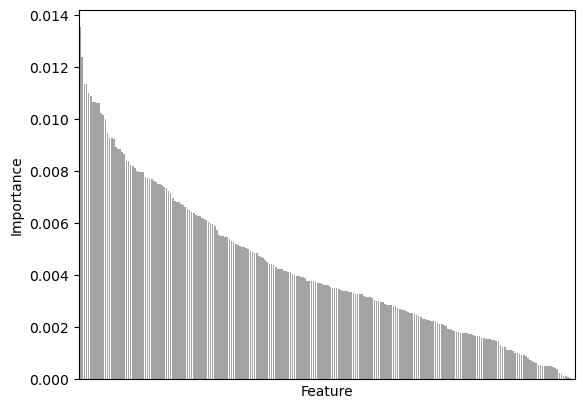

In [53]:
# Get all features
all_indices = abs_coefficients.argsort()[:][::-1]

all_features = [data_final_features.columns[i] for i in all_indices]



# All features plot
feature_importance_df_all = pd.DataFrame(columns=['Feature', 'Importance'])

# Iterate over the top_10_features list
for feature in all_features:
    importance_all = sorted_feature_importance.get(feature)
    feature_importance_df_all = feature_importance_df_all.append({'Feature': feature, 'Importance': importance_all}, ignore_index=True)

# Print the feature importance DataFrame
print(feature_importance_df_all)


feature_importance_all_plot = sns.barplot(feature_importance_df_all, x = 'Feature', y = 'Importance', color = color_palette_bbg[2])
# feature_importance_all_plot.set_xticklabels(feature_importance_all_plot.get_xticklabels(), rotation=90)
plt.xticks([])
plt.savefig('../output/feature_importance_all')



/var/folders/1n/wdp99cbs11199mw5mbmqfct40000gn/T/ipykernel_21248/588339334.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df_top_10 = feature_importance_df_top_10.append({'Feature': feature, 'Importance': importance_top_10}, ignore_index=True)
/var/folders/1n/wdp99cbs11199mw5mbmqfct40000gn/T/ipykernel_21248/588339334.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df_top_10 = feature_importance_df_top_10.append({'Feature': feature, 'Importance': importance_top_10}, ignore_index=True)
/var/folders/1n/wdp99cbs11199mw5mbmqfct40000gn/T/ipykernel_21248/588339334.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df_top_10 = feature_importance_df_top_10.append({'F

                                             Feature  Importance
0          DTI_TR_ET_Intensity_MeanAbsoluteDeviation    0.013530
1  DTI_FA_ED_GLSZM_Bins-16_Radius-1_GreyLevelVari...    0.012380
2  T2_ET_GLSZM_Bins-16_Radius-1_ZoneSizeNoneUnifo...    0.011375
3  DTI_RD_ED_GLSZM_Bins-16_Radius-1_ZoneSizeNonUn...    0.011359
4  DSC_ap-rCBV_ED_Histogram_Bins-16_Bins-16_Bin-1...    0.011023
5       DTI_RD_ED_GLCM_Bins-16_Radius-1_ClusterShade    0.010889
6     T1_ET_GLSZM_Bins-16_Radius-1_GreyLevelVariance    0.010675
7  T1GD_ET_Histogram_Bins-16_Bins-16_MedianAbsolu...    0.010659
8                          DSC_PSR_ET_NGTDM_Contrast    0.010635
9  DTI_RD_ET_Histogram_Bins-16_Bins-16_MeanAbsolu...    0.010627


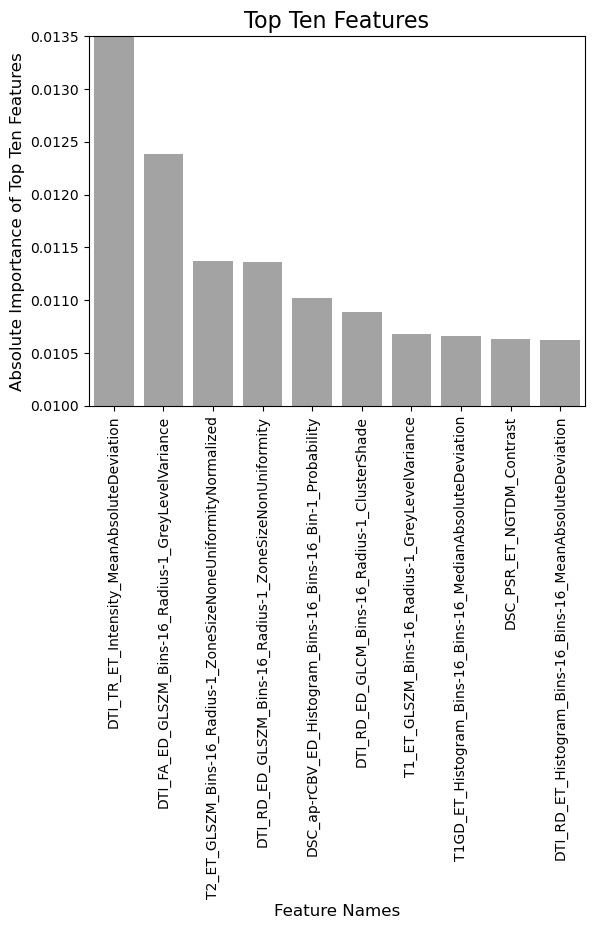

In [54]:
#Top 10 features plot

feature_importance_df_top_10 = pd.DataFrame(columns=['Feature', 'Importance'])

# Iterate over the top_10_features list
for feature in top_10_features:
    importance_top_10 = sorted_feature_importance.get(feature)
    feature_importance_df_top_10 = feature_importance_df_top_10.append({'Feature': feature, 'Importance': importance_top_10}, ignore_index=True)

# Print the feature importance DataFrame
print(feature_importance_df_top_10)

feature_importance_top_10_plot = sns.barplot(feature_importance_df_top_10, x = 'Feature', y = 'Importance', color = color_palette_bbg[2])
feature_importance_top_10_plot.set_xticklabels(feature_importance_top_10_plot.get_xticklabels(), rotation=90)
plt.ylim(0.008, 0.014)

plt.xlabel('Feature Names', fontsize=12)
plt.ylabel('Absolute Importance of Top Ten Features', fontsize=12)
plt.title('Top Ten Features', fontsize=16)
plt.ylim(0.01, 0.0135)

plt.savefig('../output/top10_feature_importance')


### Top Ten Features Linear?

     DTI_TR_ET_Intensity_MeanAbsoluteDeviation  \
120                              -5.134651e-13   
108                               8.936746e-13   
191                               7.642105e-13   
218                               3.412438e-13   
126                               3.115388e-12   
..                                         ...   
141                               2.978578e-13   
103                              -2.172418e-12   
237                               2.334113e-13   
10                               -1.989574e-12   
13                               -2.556849e-14   

     DTI_FA_ED_GLSZM_Bins-16_Radius-1_GreyLevelVariance  \
120                                          11.918332    
108                                           7.975731    
191                                          11.373318    
218                                          13.003837    
126                                           8.784029    
..                                           

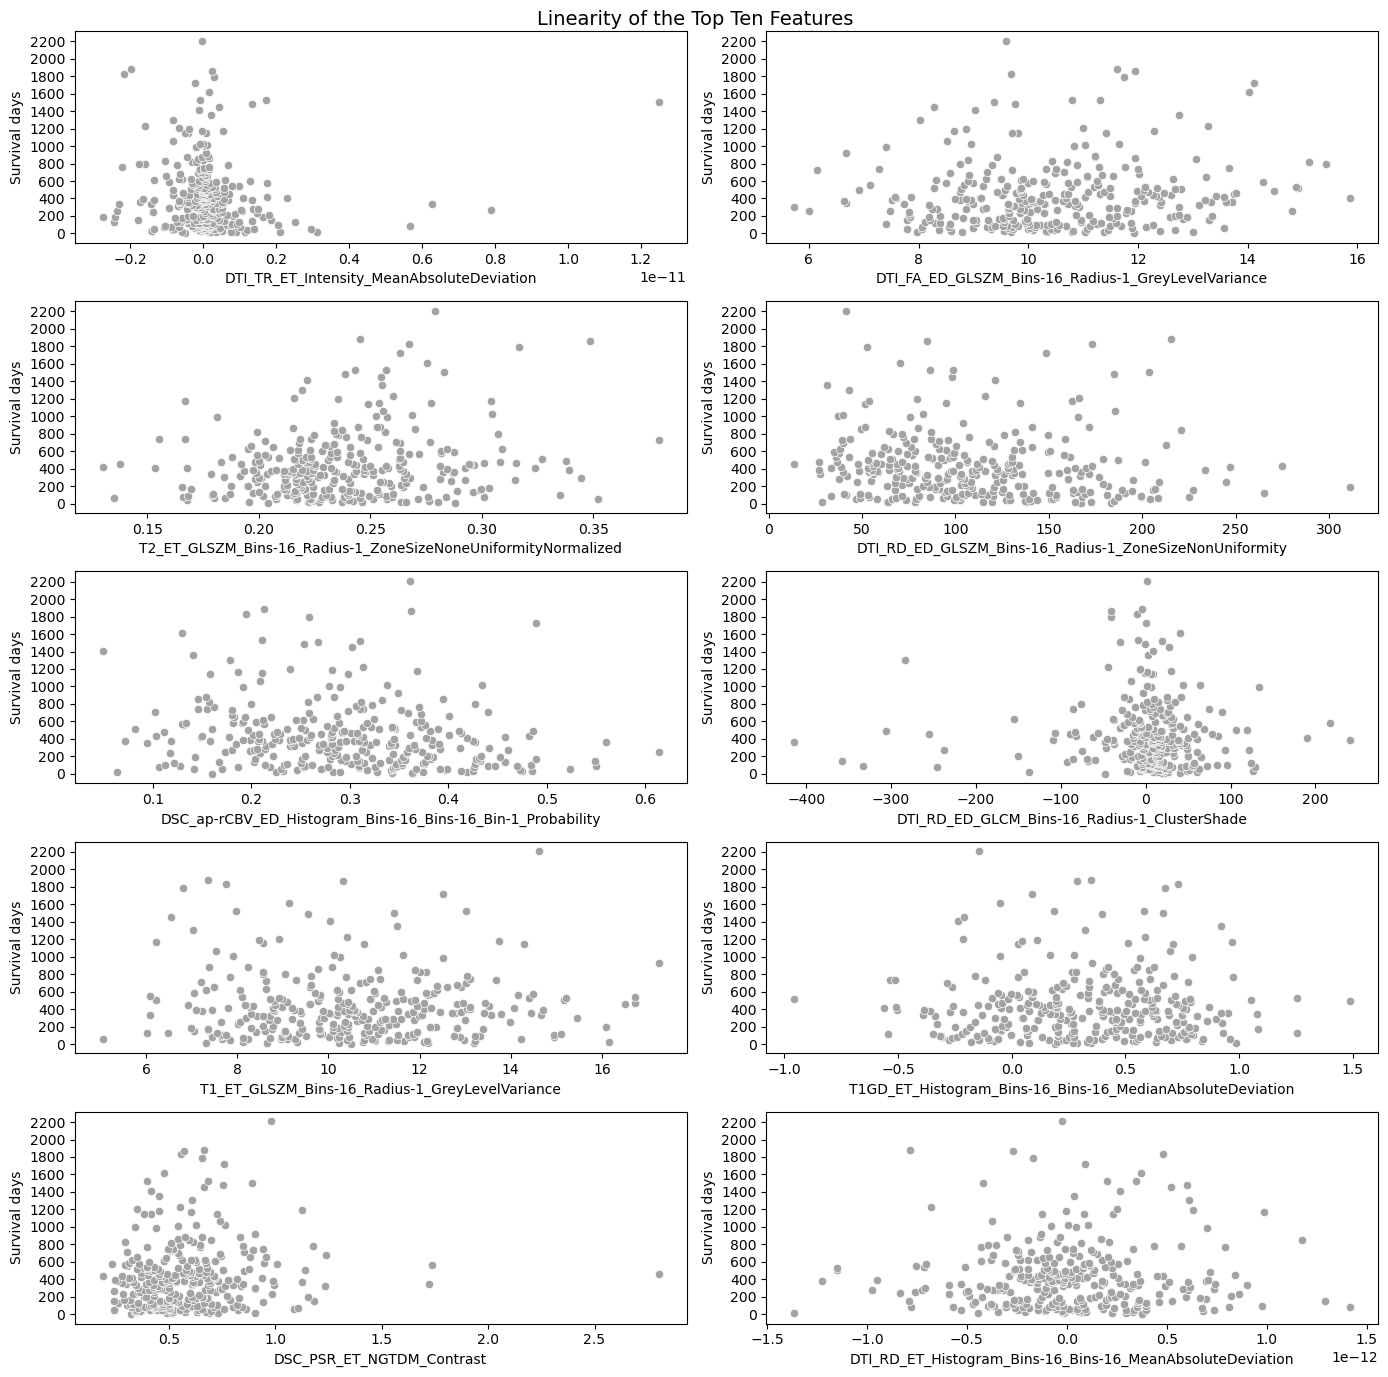

In [55]:
top10_features_names = feature_importance_df_top_10['Feature']
#print(top10_features_names)
top10_features_list = top10_features_names.tolist()
top10_features_data = pd.merge(merged_df[top10_features_list], merged_df['Survival_from_surgery_days'], left_index=True, right_index=True)
top10_features_data['Survival_from_surgery_days'] = pd.to_numeric(top10_features_data['Survival_from_surgery_days'])
top10_features_data = top10_features_data.sort_values(by='Survival_from_surgery_days', ascending = True)
print(top10_features_data)

import matplotlib.ticker as mticker

fig, axes = plt.subplots(5, 2, figsize=(14, 14))
axes = axes.flatten()
for i, feature in enumerate(top10_features_list):
    ax = sns.scatterplot(data = top10_features_data, x = feature , y = 'Survival_from_surgery_days', ax = axes[i], color = color_palette_bbg[2])
    ax.set_xlabel(feature)
    ax.set_ylabel('Survival days')
    ax.yaxis.set_major_locator(mticker.MultipleLocator(200))

    
fig.suptitle('Linearity of the Top Ten Features', fontsize=14)
plt.tight_layout()

plt.savefig('../output/Linearity_TopTenFeatures.png')

plt.show()



## Evaluation of the final model (Ridge Regression)

In [56]:
#compute model with our training set and predict it for the test set
clf_ridge.fit(data_final_features, df_y_train)
coefficients_RidgeR = clf_ridge.coef_
intercept_RidgeR = clf_ridge.intercept_
y_pred_test_RidgeR = clf_ridge.predict(df_X_test_final_features)

# Calculate the evaluation metrics for regression
r2_RidgeR = r2_score(df_y_test, y_pred_test_RidgeR)
mse_RidgeR = mean_squared_error(df_y_test, y_pred_test_RidgeR)
rmse_RidgeR = sqrt(mse_RidgeR)
mae_RidgeR = mean_absolute_error(df_y_test, y_pred_test_RidgeR)

df_performance_RidgeR = {'R2': r2_RidgeR, 'RMSE': rmse_RidgeR, 'MAE': mae_RidgeR}

print(df_performance_RidgeR)


{'R2': -1.0747066826920983, 'RMSE': 648.1000110901838, 'MAE': 478.90462156658964}
